In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout
import yfinance as yf

In [2]:
ticker_symbols = ['GOOGL']

data = yf.download(ticker_symbols, start='2022-01-01', end='2022-12-31')
data.to_csv('stock_data.csv')

[*********************100%%**********************]  1 of 1 completed


In [3]:
data=pd.read_csv('GOOGL_data.csv')
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       251 non-null    object 
 1   Open       251 non-null    float64
 2   High       251 non-null    float64
 3   Low        251 non-null    float64
 4   Close      251 non-null    float64
 5   Adj Close  251 non-null    float64
 6   Volume     251 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


In [4]:
data['Date']=pd.to_datetime(data['Date'])
data['Date']
print(f'Dataframe contains stock prices between{data.Date.min()} -- {data.Date.max()}')
print(f'Total days = {(data.Date.max()-data.Date.min()).days} days')

Dataframe contains stock prices between2022-01-03 00:00:00 -- 2022-12-30 00:00:00
Total days = 361 days


In [5]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-01-03,145.054993,145.850998,143.712997,144.991501,144.991501,28646000
1,2022-01-04,145.395996,146.485001,143.716507,144.399506,144.399506,28400000
2,2022-01-05,144.419998,144.499496,137.688004,137.774994,137.774994,54618000
3,2022-01-06,136.998505,139.940002,136.558502,137.747498,137.747498,37348000
4,2022-01-07,138.145493,138.448502,135.766495,137.016998,137.016998,29760000


In [6]:
data.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,251,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,2022-07-02 15:23:39.920318720,114.879681,116.483813,113.201064,114.760371,114.760371,3.476753e+07
min,2022-01-03 00:00:00,85.400002,86.519997,83.339996,83.430000,83.430000,9.701400e+06
25%,2022-04-02 12:00:00,100.005001,101.884998,99.134998,100.879997,100.879997,2.601215e+07
50%,2022-07-05 00:00:00,113.404999,115.589500,112.480003,113.891998,113.891998,3.169600e+07
75%,2022-10-01 12:00:00,130.606255,131.892998,127.320999,129.215500,129.215500,3.997200e+07
max,2022-12-30 00:00:00,151.250000,151.546494,145.522507,148.000000,148.000000,1.232000e+08
std,NaN,16.268895,16.297471,15.952845,16.109141,16.109141,1.361927e+07


<Axes: >

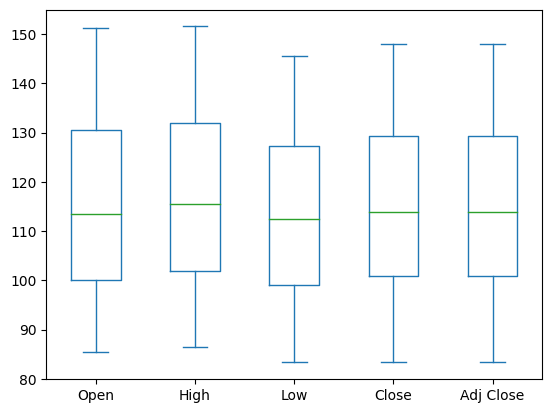

In [7]:
data[['Open','High','Low','Close','Adj Close']].plot(kind='box')

In [8]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(data['Close'].values.reshape(-1,1))

In [9]:
prediction_days=60

x_train=[]
y_train=[]
for x in range(prediction_days,len(scaled_data)):
    x_train.append(scaled_data[x-prediction_days:x,0])
    y_train.append(scaled_data[x,0])
x_train,y_train=np.array(x_train),np.array(y_train)

x_train.shape


(191, 60)

In [10]:
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(191, 60, 1)

In [11]:
model=Sequential()

model.add(LSTM(units=50, return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

In [12]:
model.compile(optimizer='adam',loss='mean_squared_error')

model.fit(x_train,y_train,epochs=25,batch_size=32)

Epoch 1/25
6/6 [==============================] - 19s 176ms/step - loss: 0.0789
Epoch 2/25
6/6 [==============================] - 1s 172ms/step - loss: 0.0269
Epoch 3/25
6/6 [==============================] - 1s 168ms/step - loss: 0.0203
Epoch 4/25
6/6 [==============================] - 1s 191ms/step - loss: 0.0142
Epoch 5/25
6/6 [==============================] - 1s 168ms/step - loss: 0.0138
Epoch 6/25
6/6 [==============================] - 1s 168ms/step - loss: 0.0113
Epoch 7/25
6/6 [==============================] - 1s 218ms/step - loss: 0.0106
Epoch 8/25
6/6 [==============================] - 1s 174ms/step - loss: 0.0114
Epoch 9/25
6/6 [==============================] - 1s 217ms/step - loss: 0.0101
Epoch 10/25
6/6 [==============================] - 1s 174ms/step - loss: 0.0084
Epoch 11/25
6/6 [==============================] - 1s 203ms/step - loss: 0.0088
Epoch 12/25
6/6 [==============================] - 1s 170ms/step - loss: 0.0087
Epoch 13/25
6/6 [==============================]

In [13]:
import yfinance as yf
ts=['GOOGL']
data=yf.download(ts, start='2023-01-01', end='2023-10-7')
data.to_csv('GOOGL_test_data.csv')

[*********************100%%**********************]  1 of 1 completed


In [14]:
test_data=pd.read_csv('GOOGL_test_data.csv')
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       192 non-null    object 
 1   Open       192 non-null    float64
 2   High       192 non-null    float64
 3   Low        192 non-null    float64
 4   Close      192 non-null    float64
 5   Adj Close  192 non-null    float64
 6   Volume     192 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 10.6+ KB


In [15]:
test_data = pd.read_csv('GOOGL_test_data.csv')
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_test_data = scaler.fit_transform(test_data['Close'].values.reshape(-1, 1))


In [16]:
x_test = []
y_test = []
for x in range(prediction_days, len(scaled_test_data)):
    x_test.append(scaled_test_data[x - prediction_days:x, 0])
    y_test.append(scaled_test_data[x, 0])
x_test, y_test = np.array(x_test), np.array(y_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))


In [17]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

5/5 [==============================] - 4s 63ms/step


In [18]:
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))


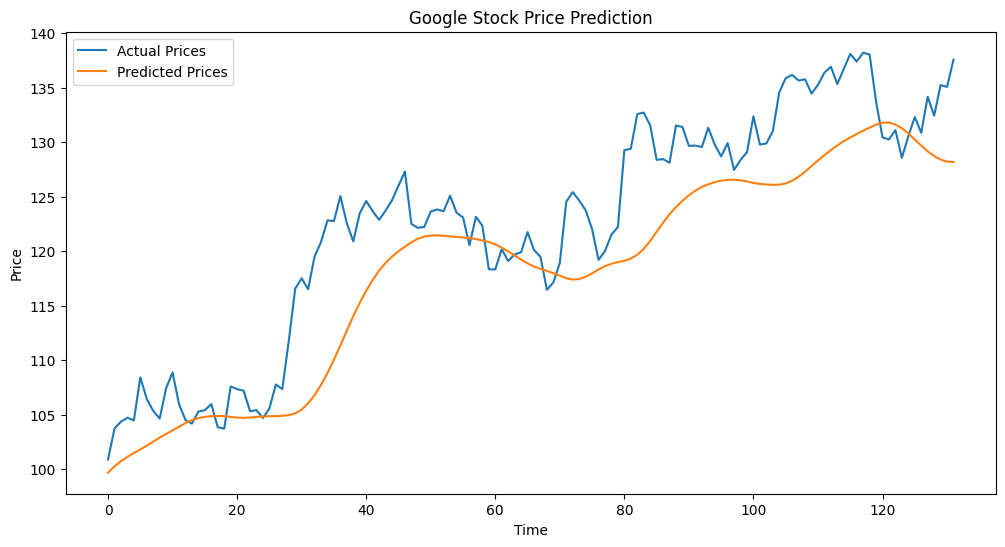

In [19]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual Prices')
plt.plot(predictions, label='Predicted Prices')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [20]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")

Mean Squared Error: 34.09667787073573
Mean Absolute Error: 4.629836689342153
